# Visualizations for Geography and Dependants

1. Import Libarary and Dataframe\
2. Customer Region Analysis\
    a. Create Region Flag\
    b. Spending Habits By Region
3. Customer Activity\
    a. Create Exclusion Flag "Activity Flag"\
    b. Create and Export High Activity Dataframe
4. Customer Demographics\
    a. Create Age Flag\
    b. Create Dependant Flag\
    c. Create Income Flag\
    d. Export High Activity Data Frame with New Flags
5. Create Customer Profile\
    a. Create Profiles\
    b. Export Dataframe with Profile
6. Customer Profile Visualizations\
    a. Distribution of Customer Profile\
    b. Customers by Income\
    c. Middle Class by Departments Purchased\
    d. Basic Statistical Analysis of Use Frequency and Expenditure by Profile\
    e. Create Crosstab for Profiles/Regions\
    f. Create Crosstab for Profiles/Departments\
    g. Age and Family Status by Ordering Habits
    


## 1. Import Libarary and Dataframes

In [43]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [44]:
# path_git
path_git = r'/Users/catherinemikelson/Desktop/Career Foundry/Acheivement 4 - Python Fundmentals/Instacart Basket Analysis Github'

In [45]:
# import customers data
ords_prods_cust = pd.read_pickle(os.path.join(path_git, '02 Data', 'ords_prods_cust.pkl'))

In [46]:
# check dataframe
ords_prods_cust.head(5)

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_hour,max_order,loyalty_flag,average_price,spending_flag,median_ord_freq,Frequency_flag,gender,state,age,date_joined,number_of_dependants,marital_status,income
0,2539329,1,1,2,8,NaN,True,196,1,0,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy days,average_orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,False,196,1,1,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,average_orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,False,196,1,1,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,most_orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,False,196,1,1,both,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,average_orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,False,196,1,1,both,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,most_orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


In [47]:
# check shape
ords_prods_cust.shape

(32404859, 32)

## 2. Customer Region Analysis

### a. Create Region Flag

North_East = 'Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey'

Mid_West = 'Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri'

South = 'Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virgina', 'District of Columbia', 'West Virginia', 'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 'Arkansas', 'Louisiana', 'Oklahoma', 'Texas'

West = 'Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming', 'Alaska', 'California', 'Hawaii', 'Oregon', 'Washington'

In [48]:
# state frequency
ords_prods_cust['state'].value_counts()

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

In [49]:
# create regions lists
North_East = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
Mid_West = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
South = ['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virgina', 'District of Columbia', 'West Virginia', 'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 'Arkansas', 'Louisiana', 'Oklahoma', 'Texas']
West = ['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming', 'Alaska', 'California', 'Hawaii', 'Oregon', 'Washington']

In [50]:
# create regions flags
ords_prods_cust.loc[ords_prods_cust['state'].isin(North_East), 'region'] = 'North East'
ords_prods_cust.loc[ords_prods_cust['state'].isin(Mid_West), 'region'] = 'Mid West'
ords_prods_cust.loc[ords_prods_cust['state'].isin(South), 'region'] = 'South'
ords_prods_cust.loc[ords_prods_cust['state'].isin(West), 'region'] = 'West'

In [51]:
# check value counts on regions
ords_prods_cust['region'].value_counts()

South         10150464
West           8292913
Mid West       7597325
North East     5722736
Name: region, dtype: int64

### b. Spending Habits By Region

In [52]:
# create a cross tab of spending habits/region
spend_reg_cross = pd.crosstab(ords_prods_cust['region'], ords_prods_cust['spending_flag'], dropna = False)

In [53]:
spend_reg_cross

spending_flag,High spender,Low spender
region,,
Mid West,156154,7441171
North East,108245,5614491
South,193932,9956532
West,160478,8132435


In [54]:
spend_reg_cross.to_clipboard()

## 3. Customer Activity

Note: Client is interested the customer profiles of active IC users.

### a. Create Exclusion Flag "Activity Flag" 

In [55]:
# display all columns
pd.set_option('display.max_columns', None)

In [56]:
# check output
ords_prods_cust.head()

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_hour,max_order,loyalty_flag,average_price,spending_flag,median_ord_freq,Frequency_flag,gender,state,age,date_joined,number_of_dependants,marital_status,income,region
0,2539329,1,1,2,8,NaN,True,196,1,0,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy days,average_orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2398795,1,2,3,7,15.0,False,196,1,1,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,average_orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
2,473747,1,3,3,12,21.0,False,196,1,1,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,most_orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2254736,1,4,4,7,29.0,False,196,1,1,both,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,average_orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
4,431534,1,5,4,15,28.0,False,196,1,1,both,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,most_orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South


In [57]:
# create exclusion flag for customers with 5 or fewer orders
ords_prods_cust.loc[ords_prods_cust['max_order'] >= 5, 'activity_flag'] = 'High Activity'
ords_prods_cust.loc[ords_prods_cust['max_order'] < 5, 'activity_flag'] = 'Low Activity'

In [58]:
# check value counts
ords_prods_cust['activity_flag'].value_counts()

High Activity    30964564
Low Activity      1440295
Name: activity_flag, dtype: int64

### b. Create and Export High Activity Dataframe

In [59]:
# create high activity dataframe
df_high_activity = ords_prods_cust.loc[ords_prods_cust['activity_flag'] == 'High Activity']

In [60]:
# export df_high_activity
df_high_activity.to_pickle(os.path.join(path_git, '02 Data', 'df_high_activity.pkl'))

In [61]:
# check output
df_high_activity.head()

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_hour,max_order,loyalty_flag,average_price,spending_flag,median_ord_freq,Frequency_flag,gender,state,age,date_joined,number_of_dependants,marital_status,income,region,activity_flag
0,2539329,1,1,2,8,NaN,True,196,1,0,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy days,average_orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity
1,2398795,1,2,3,7,15.0,False,196,1,1,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,average_orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity
2,473747,1,3,3,12,21.0,False,196,1,1,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,most_orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity
3,2254736,1,4,4,7,29.0,False,196,1,1,both,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,average_orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity
4,431534,1,5,4,15,28.0,False,196,1,1,both,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,most_orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity


## 4. Customer Demographics

### a. Create Age Flag

In [62]:
# check age range of customers
df_high_activity['age'].value_counts().sort_index()

18    478457
19    496077
20    480194
21    489116
22    490811
       ...  
77    477999
78    471119
79    508337
80    492750
81    485847
Name: age, Length: 64, dtype: int64

In [121]:
# create age flag
df_high_activity.loc[df_high_activity['age'] >= 65, 'age_flag'] = 'Retiree'
df_high_activity.loc[(df_high_activity['age'] >= 40) & (df_high_activity['age'] < 65), 'age_flag'] = 'Middle Aged'
df_high_activity.loc[df_high_activity['age'] <40, 'age_flag'] = 'Young Adult'   

In [64]:
# check value counts
df_high_activity['age_flag'].value_counts()

Middle Aged    12103910
Young Adult    10665110
Retiree         8195544
Name: age_flag, dtype: int64

### b. Create Dependant Flag

In [122]:
# create dependant flag
df_high_activity.loc[df_high_activity['number_of_dependants'] > 0, 'Dependant Flag'] = 'Dependants'
df_high_activity.loc[df_high_activity['number_of_dependants'] == 0, 'Dependant Flag'] = 'No Dependants'

In [66]:
# check value counts
df_high_activity['Dependant Flag'].value_counts()

Dependants       23224883
No Dependants     7739681
Name: Dependant Flag, dtype: int64

### c. Create Income Flag

In [123]:
# create activity flag
df_high_activity.loc[df_high_activity['income'] > 156600, 'income_bracket'] = 'High Income'
df_high_activity.loc[(df_high_activity['income'] <= 156600) & (df_high_activity['income'] >= 52200), 'income_bracket'] = 'Middle Income'
df_high_activity.loc[df_high_activity['income'] < 52200, 'income_bracket'] = 'Low Income'

In [68]:
# check value counts
df_high_activity['income_bracket'].value_counts()

Middle Income    24541393
Low Income        3691708
High Income       2731463
Name: income_bracket, dtype: int64

### d. Export High Activity Data Frame with New Flags

In [69]:
# export df_high_activity
df_high_activity.to_pickle(os.path.join(path_git, '02 Data', 'df_high_activity.pkl'))

In [70]:
# rename high activity Dataframe
df_high_act = df_high_activity

## 5. Create Customer Profile

Create Profiles for:
Young Adult, No Dependants, Low Income\
Young Adult, Dependants, Low Income\
Young Adult, No Dependants, Middle Income\
Young Adult, Dependants, Middle Income\
Young Adult, No Dependants, High Income\
Young Adult, Dependants, High Income\
Middle Aged, No Dependants, Low Income\
Middle Aged, Dependants, Low Income\
Middle Aged, No Dependants, Middle Income\
Middle Aged, Dependants, Middle Income\
Middle Aged, No Dependants, High Income\
Middle Aged, Dependants, High Income\
Retiree, Dependants, Low Income\
Retiree, No Dependants, Low Income\
Retiree, Dependants, Middle Income\
Retiree, No Dependants, Middle Income\
Retiree, Dependants, High Income\
Retiree, No Dependants, High Income

### a. Create Profiles

In [71]:
# check output
df_high_act.head()

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_hour,max_order,loyalty_flag,average_price,spending_flag,median_ord_freq,Frequency_flag,gender,state,age,date_joined,number_of_dependants,marital_status,income,region,activity_flag,age_flag,Dependant Flag,income_bracket
0,2539329,1,1,2,8,NaN,True,196,1,0,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy days,average_orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,Young Adult,Dependants,Low Income
1,2398795,1,2,3,7,15.0,False,196,1,1,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,average_orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,Young Adult,Dependants,Low Income
2,473747,1,3,3,12,21.0,False,196,1,1,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,most_orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,Young Adult,Dependants,Low Income
3,2254736,1,4,4,7,29.0,False,196,1,1,both,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,average_orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,Young Adult,Dependants,Low Income
4,431534,1,5,4,15,28.0,False,196,1,1,both,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,most_orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,Young Adult,Dependants,Low Income


In [72]:
# rename Dependant Flag to dependant_flag
df_high_act = df_high_act.rename(columns = {'Dependant Flag':'dependant_flag'})

In [73]:
df_high_act.head()

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_hour,max_order,loyalty_flag,average_price,spending_flag,median_ord_freq,Frequency_flag,gender,state,age,date_joined,number_of_dependants,marital_status,income,region,activity_flag,age_flag,dependant_flag,income_bracket
0,2539329,1,1,2,8,NaN,True,196,1,0,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy days,average_orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,Young Adult,Dependants,Low Income
1,2398795,1,2,3,7,15.0,False,196,1,1,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,average_orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,Young Adult,Dependants,Low Income
2,473747,1,3,3,12,21.0,False,196,1,1,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,most_orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,Young Adult,Dependants,Low Income
3,2254736,1,4,4,7,29.0,False,196,1,1,both,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,average_orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,Young Adult,Dependants,Low Income
4,431534,1,5,4,15,28.0,False,196,1,1,both,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,most_orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,Young Adult,Dependants,Low Income


In [74]:
# Young Adult, No Dependants, Low Income 
df_high_act.loc[(df_high_act['age_flag'] == 'Young Adult') & (df_high_act['dependant_flag'] == 'No Dependants') & (df_high_act['income_bracket'] == 'Low Income'), 'profile'] = 'Young Adult, No Dependants, Low Income'

In [75]:
# Young Adult, Dependants, Low Income 
df_high_act.loc[(df_high_act['age_flag'] == 'Young Adult') & (df_high_act['dependant_flag'] == 'Dependants') & (df_high_act['income_bracket'] == 'Low Income'), 'profile'] = 'Young Adult, Dependants, Low Income'

In [76]:
# Young Adult, No Dependants, Middle Income
df_high_act.loc[(df_high_act['age_flag'] == 'Young Adult') & (df_high_act['dependant_flag'] == 'No Dependants') & (df_high_act['income_bracket'] == 'Middle Income'), 'profile'] = 'Young Adult, No Dependants, Middle Income'

In [77]:
# Young Adult, Dependants, Middle Income 
df_high_act.loc[(df_high_act['age_flag'] == 'Young Adult') & (df_high_act['dependant_flag'] == 'Dependants') & (df_high_act['income_bracket'] == 'Middle Income'), 'profile'] = 'Young Adult, Dependants, Middle Income'

In [78]:
# Young Adult, No Dependants, High Income 
df_high_act.loc[(df_high_act['age_flag'] == 'Young Adult') & (df_high_act['dependant_flag'] == 'No Dependants') & (df_high_act['income_bracket'] == 'High Income'), 'profile'] = 'Young Adult, No Dependants, High Income'

In [79]:
# Young Adult, Dependants, High Income
df_high_act.loc[(df_high_act['age_flag'] == 'Young Adult') & (df_high_act['dependant_flag'] == 'Dependants') & (df_high_act['income_bracket'] == 'High Income'), 'profile'] = 'Young Adult, Dependants, High Income'

In [80]:
# Middle Aged, No Dependants, Low Income
df_high_act.loc[(df_high_act['age_flag'] == 'Middle Aged') & (df_high_act['dependant_flag'] == 'No Dependants') & (df_high_act['income_bracket'] == 'Low Income'), 'profile'] = 'Middle Aged, No Dependants, Low Income'

In [81]:
# Middle Aged, Dependants, Low Income
df_high_act.loc[(df_high_act['age_flag'] == 'Middle Aged') & (df_high_act['dependant_flag'] == 'Dependants') & (df_high_act['income_bracket'] == 'Low Income'), 'profile'] = 'Middle Aged, Dependants, Low Income'

In [82]:
# Middle Aged, No Dependants, Middle Income
df_high_act.loc[(df_high_act['age_flag'] == 'Middle Aged') & (df_high_act['dependant_flag'] == 'No Dependants') & (df_high_act['income_bracket'] == 'Middle Income'), 'profile'] = 'Middle Aged, No Dependants, Middle Income'

In [83]:
# Middle Aged, Dependants, Middle Income
df_high_act.loc[(df_high_act['age_flag'] == 'Middle Aged') & (df_high_act['dependant_flag'] == 'Dependants') & (df_high_act['income_bracket'] == 'Middle Income'), 'profile'] = 'Middle Aged, Dependants, Middle Income'

In [84]:
# Middle Aged, No Dependants, High Income
df_high_act.loc[(df_high_act['age_flag'] == 'Middle Aged') & (df_high_act['dependant_flag'] == 'No Dependants') & (df_high_act['income_bracket'] == 'High Income'), 'profile'] = 'Middle Aged, No Dependants, High Income'

In [85]:
# Middle Aged, Dependants, High Income
df_high_act.loc[(df_high_act['age_flag'] == 'Middle Aged') & (df_high_act['dependant_flag'] == 'Dependants') & (df_high_act['income_bracket'] == 'High Income'), 'profile'] = 'Middle Aged, Dependants, High Income'

In [86]:
# Retiree, No Dependants, Low Income
df_high_act.loc[(df_high_act['age_flag'] == 'Retiree') & (df_high_act['dependant_flag'] == 'No Dependants') & (df_high_act['income_bracket'] == 'Low Income'), 'profile'] = 'Retiree, No Dependants, Low Income'

In [87]:
# Retiree, Dependants, Low Income
df_high_act.loc[(df_high_act['age_flag'] == 'Retiree') & (df_high_act['dependant_flag'] == 'Dependants') & (df_high_act['income_bracket'] == 'Low Income'), 'profile'] = 'Retiree, Dependants, Low Income'

In [88]:
# Retiree, No Dependants, Middle Income
df_high_act.loc[(df_high_act['age_flag'] == 'Retiree') & (df_high_act['dependant_flag'] == 'No Dependants') & (df_high_act['income_bracket'] == 'Middle Income'), 'profile'] = 'Retiree, No Dependants, Middle Income'

In [89]:
# Retiree, Dependants, Middle Income
df_high_act.loc[(df_high_act['age_flag'] == 'Retiree') & (df_high_act['dependant_flag'] == 'Dependants') & (df_high_act['income_bracket'] == 'Middle Income'), 'profile'] = 'Retiree, Dependants, Middle Income'

In [90]:
# Retiree, No Dependants, High Income
df_high_act.loc[(df_high_act['age_flag'] == 'Retiree') & (df_high_act['dependant_flag'] == 'No Dependants') & (df_high_act['income_bracket'] == 'High Income'), 'profile'] = 'Retiree, No Dependants, High Income'

In [91]:
# Retiree, Dependants, High Income
df_high_act.loc[(df_high_act['age_flag'] == 'Retiree') & (df_high_act['dependant_flag'] == 'Dependants') & (df_high_act['income_bracket'] == 'High Income'), 'profile'] = 'Retiree, Dependants, High Income'

In [92]:
# value counts for 'profile'
df_high_act['profile'].value_counts()

Middle Aged, Dependants, Middle Income       7060794
Young Adult, Dependants, Middle Income       6562956
Retiree, Dependants, Middle Income           4808014
Middle Aged, No Dependants, Middle Income    2362968
Young Adult, No Dependants, Middle Income    2165615
Retiree, No Dependants, Middle Income        1581046
Young Adult, Dependants, Low Income          1372370
Middle Aged, Dependants, High Income         1156376
Middle Aged, Dependants, Low Income           829592
Retiree, Dependants, High Income              803591
Retiree, Dependants, Low Income               561981
Young Adult, No Dependants, Low Income        473309
Middle Aged, No Dependants, High Income       408697
Middle Aged, No Dependants, Low Income        285483
Retiree, No Dependants, High Income           271939
Retiree, No Dependants, Low Income            168973
Young Adult, Dependants, High Income           69209
Young Adult, No Dependants, High Income        21651
Name: profile, dtype: int64

### b. Export Dataframe with Profile

In [94]:
# export df_high_activity with profile
df_high_act.to_pickle(os.path.join(path_git, '02 Data', 'df_high_act_prof.pkl'))

In [97]:
## import df_high_act_prof
df_high_act_prof = pd.read_pickle(os.path.join(path_git, '02 Data', 'df_high_act_prof.pkl'))

## 6. Customer Profile Visualizations

### a. Distribution of Customer Profile

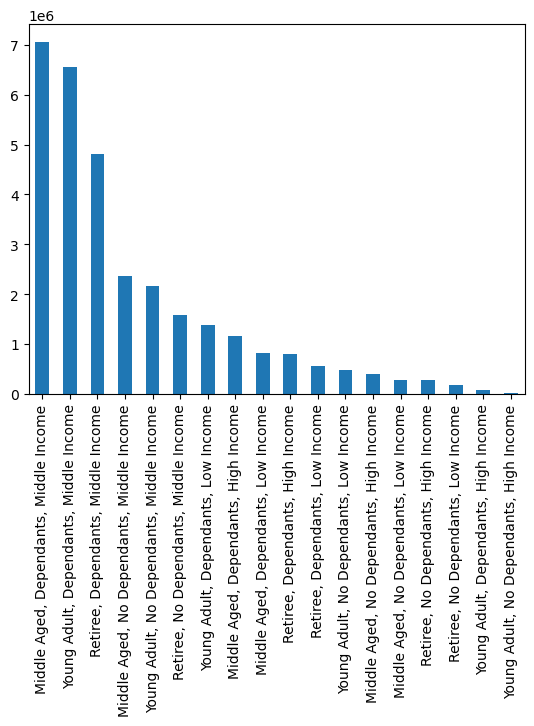

In [100]:
# create bar of profile
bar_profile = df_high_act_prof['profile'].value_counts().plot.bar()

In [101]:
# save bar chart of profile
bar_profile.figure.savefig(os.path.join(path_git, '04 Analysis', 'Visualizations', 'bar_profile.png'))

### b. Customers by Income

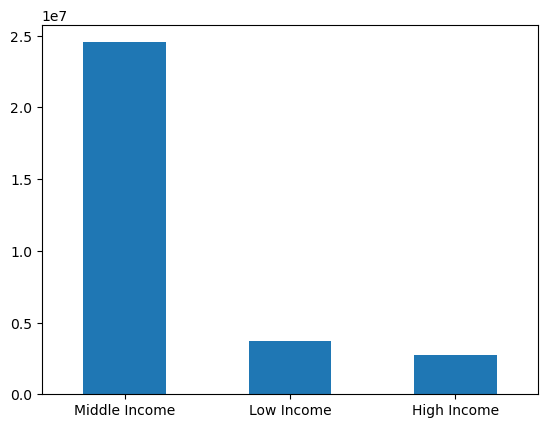

In [103]:
# create bar chart of income
bar_income = df_high_act_prof['income_bracket'].value_counts().plot.bar(rot=0)

In [106]:
# save bar chart of income
bar_income.figure.savefig(os.path.join(path_git, '04 Analysis', 'Visualizations', 'bar_income.png'))

### c. Middle Class by Departments Purchased

In [107]:
# create data frame
df_mid_class = df_high_act_prof.loc[df_high_act_prof['income_bracket'] == 'Middle Income']

In [108]:
# check output
df_mid_class.head()

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_hour,max_order,loyalty_flag,average_price,spending_flag,median_ord_freq,Frequency_flag,gender,state,age,date_joined,number_of_dependants,marital_status,income,region,activity_flag,age_flag,dependant_flag,income_bracket,profile
59,2968173,15,15,1,9,7.0,False,196,2,0,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,most_orders,22,Regular customer,3.98,Low spender,10.0,Frequent customer,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,Mid West,High Activity,Retiree,No Dependants,Middle Income,"Retiree, No Dependants, Middle Income"
60,1870022,15,17,2,16,8.0,False,196,6,1,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy days,most_orders,22,Regular customer,3.98,Low spender,10.0,Frequent customer,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,Mid West,High Activity,Retiree,No Dependants,Middle Income,"Retiree, No Dependants, Middle Income"
61,1911383,15,18,2,11,7.0,False,196,1,1,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy days,most_orders,22,Regular customer,3.98,Low spender,10.0,Frequent customer,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,Mid West,High Activity,Retiree,No Dependants,Middle Income,"Retiree, No Dependants, Middle Income"
62,2715276,15,21,1,9,7.0,False,196,1,1,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,most_orders,22,Regular customer,3.98,Low spender,10.0,Frequent customer,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,Mid West,High Activity,Retiree,No Dependants,Middle Income,"Retiree, No Dependants, Middle Income"
63,487368,15,22,1,10,14.0,False,196,1,1,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,most_orders,22,Regular customer,3.98,Low spender,10.0,Frequent customer,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,Mid West,High Activity,Retiree,No Dependants,Middle Income,"Retiree, No Dependants, Middle Income"


In [109]:
# check shape
df_mid_class.shape

(24541393, 38)

Text(0.5, 1.0, 'Count of Departments - Middle Income')

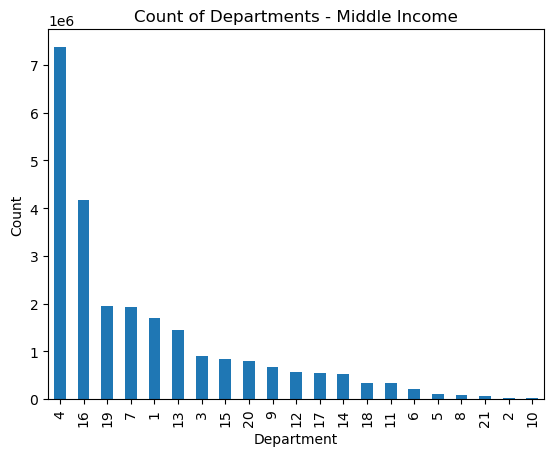

In [110]:
# create bar chart for Middle Income by department count
bar_department = df_mid_class['department_id'].value_counts().plot.bar()
bar_department.set_ylabel('Count')
bar_department.set_xlabel('Department')
bar_department.set_title('Count of Departments - Middle Income')

In [111]:
# save middle income/department chart
bar_department.figure.savefig(os.path.join(path_git, '04 Analysis', 'Visualizations', 'bar_dept_mid_income.png'))

### d. Basic Statistical Analysis of Use Frequency and Expenditure by Profile

In [112]:
# statistics for profile with 'prices' and 'days_since_prior_order'
df_high_act_prof.groupby('profile').agg({'prices': ['mean', 'min', 'max'], 'days_since_prior_order': ['mean', 'min', 'max']})

prices                \
                                                 mean  min      max   
profile                                                               
Middle Aged, Dependants, High Income        32.807821  1.0  99999.0   
Middle Aged, Dependants, Low Income          6.532956  1.0     25.0   
Middle Aged, Dependants, Middle Income       8.997587  1.0  99999.0   
Middle Aged, No Dependants, High Income     31.079353  1.0  99999.0   
Middle Aged, No Dependants, Low Income       6.534084  1.0     25.0   
Middle Aged, No Dependants, Middle Income    9.786251  1.0  99999.0   
Retiree, Dependants, High Income            29.854363  1.0  99999.0   
Retiree, Dependants, Low Income              6.507172  1.0     25.0   
Retiree, Dependants, Middle Income           9.241409  1.0  99999.0   
Retiree, No Dependants, High Income         30.021251  1.0  99999.0   
Retiree, No Dependants, Low Income           6.509028  1.0     25.0   
Retiree, No Dependants, Middle Income        9.498193  1.0  99999.0   
Young Adult, Dependants, High Income       298.731032  1.0  99999.0   
Young Adult, Dependants, Low Income          7.010531  1.0     25.0   
Young Adult, Dependants, Middle Income      10.145010  1.0  99999.0   
Young Adult, No Dependants, High Income    250.945536  1.0  99999.0   
Young Adult, No Dependants, Low Income       7.006266  1.0     25.0   
Young Adult, No Dependants, Middle Income   10.596745  1.0  99999.0   

                                          days_since_prior_order             
                                                            mean  min   max  
profile                                                                      
Middle Aged, Dependants, High Income                   10.737212  0.0  30.0  
Middle Aged, Dependants, Low Income                    11.310897  0.0  30.0  
Middle Aged, Dependants, Middle Income                 10.824443  0.0  30.0  
Middle Aged, No Dependants, High Income                10.434956  0.0  30.0  
Middle Aged, No Dependants, Low Income                 10.945169  0.0  30.0  
Middle Aged, No Dependants, Middle Income              10.737864  0.0  30.0  
Retiree, Dependants, High Income                       10.679928  0.0  30.0  
Retiree, Dependants, Low Income                        10.995345  0.0  30.0  
Retiree, Dependants, Middle Income                     10.796576  0.0  30.0  
Retiree, No Dependants, High Income                    10.652990  0.0  30.0  
Retiree, No Dependants, Low Income                     11.272059  0.0  30.0  
Retiree, No Dependants, Middle Income                  10.734925  0.0  30.0  
Young Adult, Dependants, High Income                   10.628213  0.0  30.0  
Young Adult, Dependants, Low Income                    11.170946  0.0  30.0  
Young Adult, Dependants, Middle Income                 10.703864  0.0  30.0  
Young Adult, No Dependants, High Income                10.568542  0.0  30.0  
Young Adult, No Dependants, Low Income                 11.089150  0.0  30.0  
Young Adult, No Dependants, Middle Income              10.857833  0.0  30.0

### e. Create Crosstab for Profiles/Regions

In [113]:
# create crosstab of region/profile
crosstab_regions_profile = pd.crosstab(df_high_act_prof['profile'], df_high_act_prof['region'], dropna = False)

In [114]:
# check output
crosstab_regions_profile

region,Mid West,North East,South,West
profile,,,,
"Middle Aged, Dependants, High Income",281141,204546,350916,292627
"Middle Aged, Dependants, Low Income",190451,143665,265086,214915
"Middle Aged, Dependants, Middle Income",1665902,1254448,2178340,1823230
"Middle Aged, No Dependants, High Income",96710,68705,124743,105804
"Middle Aged, No Dependants, Low Income",66624,49204,97211,67034
"Middle Aged, No Dependants, Middle Income",573638,387573,736770,623262
"Retiree, Dependants, High Income",181475,136821,258975,203895
"Retiree, Dependants, Low Income",128147,102573,178506,145290
"Retiree, Dependants, Middle Income",1124343,866574,1490431,1233744


### f. Create Crosstab for Profiles/Departments

In [115]:
# create crosstab for departments and profile
crosstab_depts_profile = pd.crosstab(df_high_act_prof['profile'], df_high_act_prof['department_id'], dropna = False)

In [116]:
# check output
crosstab_depts_profile

department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
profile,,,,,,,,,,,,,,,,,,,,,
"Middle Aged, Dependants, High Income",82386,1268,44844,334726,6756,9950,93927,3585,32327,1122,16153,27655,69045,24556,40707,195723,27277,14910,89463,37628,2368
"Middle Aged, Dependants, Low Income",52077,976,26391,201548,4467,4851,97771,2199,15496,1368,12122,7038,39775,22687,18171,118519,22449,6483,148148,25332,1724
"Middle Aged, Dependants, Middle Income",486156,7671,255632,2108241,29982,59764,567176,21530,192789,7276,98798,163156,413431,149275,237127,1192058,157643,100227,569086,228698,15078
"Middle Aged, No Dependants, High Income",28433,446,15308,120785,2704,3309,32223,1768,10829,370,5159,8649,24032,8782,13408,70164,9096,6960,31860,13578,834
"Middle Aged, No Dependants, Low Income",17853,305,8305,69935,1320,1664,33551,500,5266,360,4000,2389,13686,7878,5858,41929,6810,1503,51959,9843,569
"Middle Aged, No Dependants, Middle Income",163773,2681,88349,707081,11049,20408,189060,6445,64614,2386,32215,54245,138191,50437,79578,397414,50847,32649,189054,77711,4781
"Retiree, Dependants, High Income",56436,983,31701,230720,5244,6721,66087,2777,22153,726,11108,19756,48256,16627,27106,135026,19549,11219,63017,26590,1789
"Retiree, Dependants, Low Income",34861,612,17119,137428,2869,3208,68862,1244,9525,845,7770,4499,27134,16468,12197,82028,14964,4390,97994,16956,1008
"Retiree, Dependants, Middle Income",331849,5196,174759,1444864,19441,40757,380429,14328,132342,5280,64083,112564,281258,99715,163463,812218,107103,64703,387242,156285,10135


### g. Age and Family Status by Ordering Habits

In [117]:
# create crosstab for age/spending 
crosstab_age_spending_flag = pd.crosstab(df_high_act_prof['age_flag'], df_high_act_prof['spending_flag'], dropna = False)

In [118]:
crosstab_age_spending_flag

spending_flag,High spender,Low spender
age_flag,,
Middle Aged,245980,11857930
Retiree,157031,8038513
Young Adult,200943,10464167


Text(0.5, 1.0, 'Spending by Age')

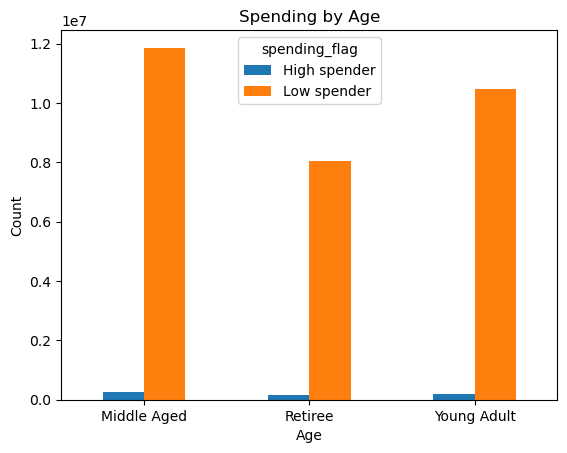

In [119]:
#create bar for age/spending
bar_age_spending = crosstab_age_spending_flag.plot.bar(rot=0)
bar_age_spending.set_ylabel('Count')
bar_age_spending.set_xlabel('Age')
bar_age_spending.set_title('Spending by Age')

In [120]:
# save middle income/department chart
bar_age_spending.figure.savefig(os.path.join(path_git, '04 Analysis', 'Visualizations', 'bar_age_spending.png'))